In [7]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [8]:
band4=rasterio.open("B5_swir1.tif")
band5=rasterio.open("B7_swir2.tif")

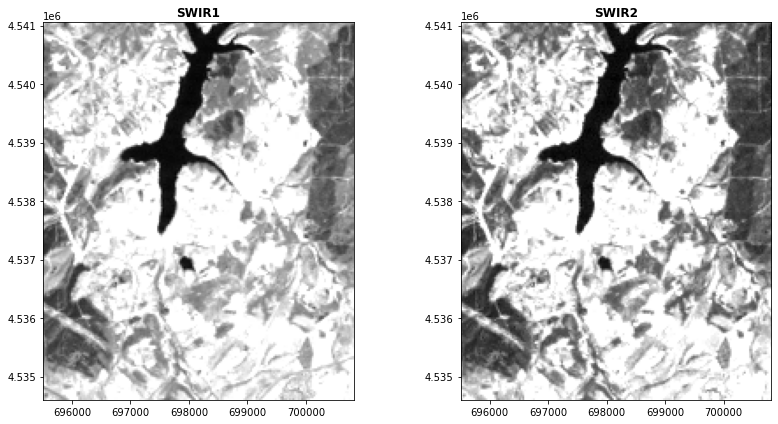

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(band4, ax=ax1, cmap='gray', title='SWIR1')
plot.show(band5, ax=ax2, cmap='gray', title='SWIR2')
fig.tight_layout()

In [10]:
swir1=band4.read(1).astype('float64')
swir2=band5.read(1).astype('float64')

In [11]:
NDSI=np.where(
    (swir1+swir2)==0., 
    0, 
    (swir1-swir2)/(swir1+swir2))

In [12]:
NDSI_image_v2 = rasterio.open('NDSI_image_v2.tiff','w',driver='Gtiff',
                          width=band4.width, 
                          height = band4.height, 
                          count=1, crs=band4.crs, 
                          transform=band4.transform, 
                          dtype='float64')
NDSI_image_v2.write(NDSI,1)
NDSI_image_v2.close()

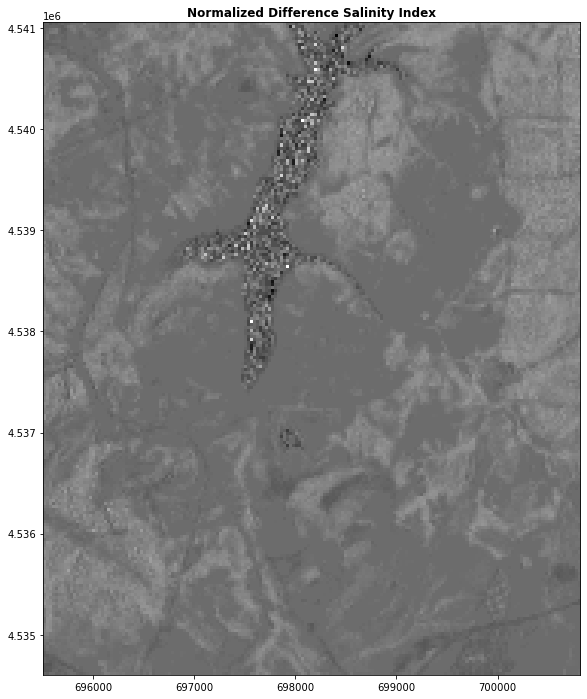

<AxesSubplot:title={'center':'Normalized Difference Salinity Index'}>

In [13]:
NDSIimg = rasterio.open('NDSI_image.tiff')
fig = plt.figure(figsize=(18,12))
plot.show(NDSIimg, cmap='gray', title='Normalized Difference Salinity Index')

In [14]:
from skimage import io, exposure
import skimage.io

In [15]:
def image_histogram(img):
    
    co, ce = exposure.histogram(NDSI)
    
    fig = plt.figure(figsize=(40, 10))
    fig.set_facecolor('white')
    plt.plot(ce[1::], co[1::])
    plt.show()

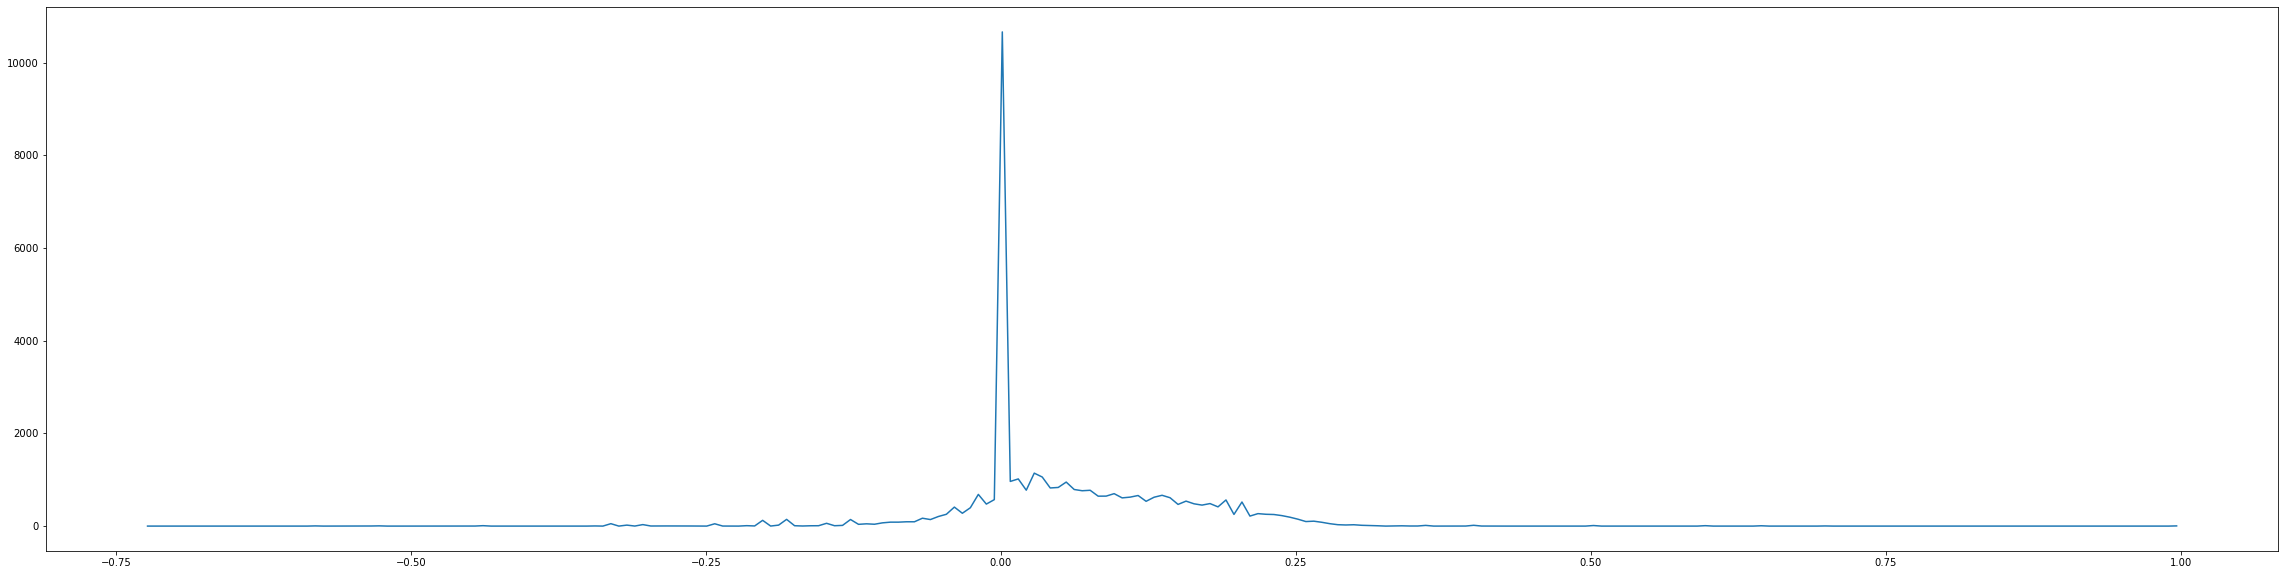

In [16]:
image_histogram(NDSIimg)